In [1]:
import tequila as tq

# Hello World H2
[source](https://github.com/aspuru-guzik-group/tequila-tutorials/blob/main/Chemistry.ipynb)

In [15]:
import tequila as tq
active_orbitals = {'A1':[1], 'B1':[0]}
molecule = tq.chemistry.Molecule(geometry='H 0.0 0.0 0.0\nLi 0.0 0.0 1.6', basis_set='sto-3g', active_orbitals=active_orbitals)
hamilton = molecule.make_hamiltonian()

# Define a hand designed circuit.
U = tq.gates.Ry(angle='a', target=0) + tq.gates.X(target=[2,3])
U += tq.gates.X(target=1, control=0)
U += tq.gates.X(target=2, control=0)
U += tq.gates.X(target=3, control=1)

expectationvalue = tq.ExpectationValue(H=hamilton, U=U)

# Optimize.
result = tq.minimize(objective=expectationvalue, method='BFGS', initial_values={k:0.0 for k in expectationvalue.extract_variables()})

# Compute a reference value with psi4
fci = molecule.compute_energy(method='fci')

print("VQE : {:+2.8}f".format(result.energy))
print("FCI : {:+2.8}f".format(fci));
vars(result)
result.history.energies

Optimizer: <class 'tequila.optimizers.optimizer_scipy.OptimizerSciPy'> 
backend         : qulacs
device          : None
samples         : None
save_history    : True
noise           : None

Method          : BFGS
Objective       : 1 expectationvalues
gradient        : 2 expectationvalues

active variables : 1

E=-7.19702401  angles= {a: 0.0}  samples= None
E=-7.19766373  angles= {a: -0.0234220027923584}  samples= None
E=-7.20203763  angles= {a: -0.11711001396179199}  samples= None
E=-7.24749228  angles= {a: -0.49186205863952637}  samples= None
E=-7.68640044  angles= {a: -1.9908702373504639}  samples= None
E=-7.59671569  angles= {a: -7.986902952194214}  samples= None
E=-7.86212174  angles= {a: -3.1296004573374767}  samples= None
E=-7.59889693  angles= {a: -1.7104055550334705}  samples= None
E=-7.86268191  angles= {a: -3.0777237637496664}  samples= None
E=-7.86268890  angles= {a: -3.0712456201159157}  samples= None
Optimization terminated successfully.
         Current function value: -7

[-7.862121739985106, -7.8626819139001345, -7.862688897539101]

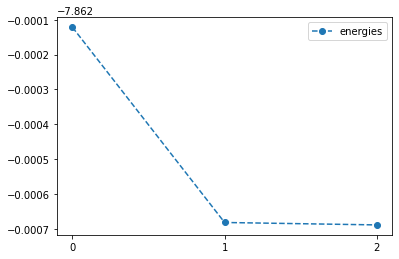

In [6]:
# More information from the optimization
result.history.plot('energies', baseline={'fci':fci})

# Prototype function for benchmarking (tequila)

In [24]:
import tequila as tq
def benchmark(molecule, circuit, method='BFGS'):
    E = tq.ExpectationValue(H=molecule.make_hamiltonian(), U=circuit)
    result = tq.minimize(objective=E, method=method, initial_values={k:0.0 for k in E.extract_variables()}, silent=True)
    fci = molecule.compute_energy(method='fci')
    return {
        'accuracy': abs(result.energy - fci),
        'iterations': len(result.history.energies),
        'measurements': 'unknown',
        'gate_depth': 'somefuncsomething'
    }

## Test 1

In [25]:
# Molecule
active_orbitals = {'A1':[1], 'B1':[0]}
molecule = tq.chemistry.Molecule(geometry='H 0.0 0.0 0.0\nLi 0.0 0.0 1.6', basis_set='sto-3g', active_orbitals=active_orbitals)

# Circuit
U = tq.gates.Ry(angle='a', target=0) + tq.gates.X(target=[2,3])
U += tq.gates.X(target=1, control=0)
U += tq.gates.X(target=2, control=0)
U += tq.gates.X(target=3, control=1)

benchmark(molecule, U)

{'accuracy': 2.7107205369247822e-12,
 'iterations': 3,
 'measurements': 'unknown',
 'gate_depth': ''}

# Sandbox

In [20]:
U = tq.gates.Ry(angle='a', target=0) + tq.gates.X(target=[2,3])
U += tq.gates.X(target=1, control=0)
U += tq.gates.X(target=2, control=0)
U += tq.gates.X(target=3, control=1)

vars(U)

{'_n_qubits': None,
 '_min_n_qubits': 0,
 '_gates': [Ry(target=(0,), parameter=a),
  X(target=(2, 3), control=()),
  X(target=(1,), control=(0,)),
  X(target=(2,), control=(0,)),
  X(target=(3,), control=(1,))],
 '_parameter_map': defaultdict(list, {a: [(0, Ry(target=(0,), parameter=a))]})}

In [27]:
import tequila as tq
active_orbitals = {'A1':[1], 'B1':[0]}
molecule = tq.chemistry.Molecule(geometry='H 0.0 0.0 0.0\nLi 0.0 0.0 1.6', basis_set='sto-3g', active_orbitals=active_orbitals)
hamilton = molecule.make_hamiltonian()

# Define a hand designed circuit.
U = tq.gates.Ry(angle='a', target=0) + tq.gates.X(target=[2,3])
U += tq.gates.X(target=1, control=0)
U += tq.gates.X(target=2, control=0)
U += tq.gates.X(target=3, control=1)

E = tq.ExpectationValue(H=hamilton, U=U)

E.extract_variables()

[a]